# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [46]:
df_demo = pd.read_csv('demo_ml.csv')

df_demo.head(5)

,Unnamed: 0,idade,tempo_emprego,mau,sexo_1,posse_de_veiculo_1,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,1,52.356164,8.358904,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,2,52.356164,8.358904,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,3,46.224658,2.106849,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,4,29.230137,3.021918,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

*1. Defina um objeto com a função da árvore de decisão vista em aula.*

*O objeto com a função será a coluna 'mau'*

In [47]:
df_y = df_demo['mau']

df_x = df_demo[['posse_de_veiculo_1']]


*2. Treino do modelo de dados*

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=30)

In [63]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [64]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

*3. Visualização da Árvore*

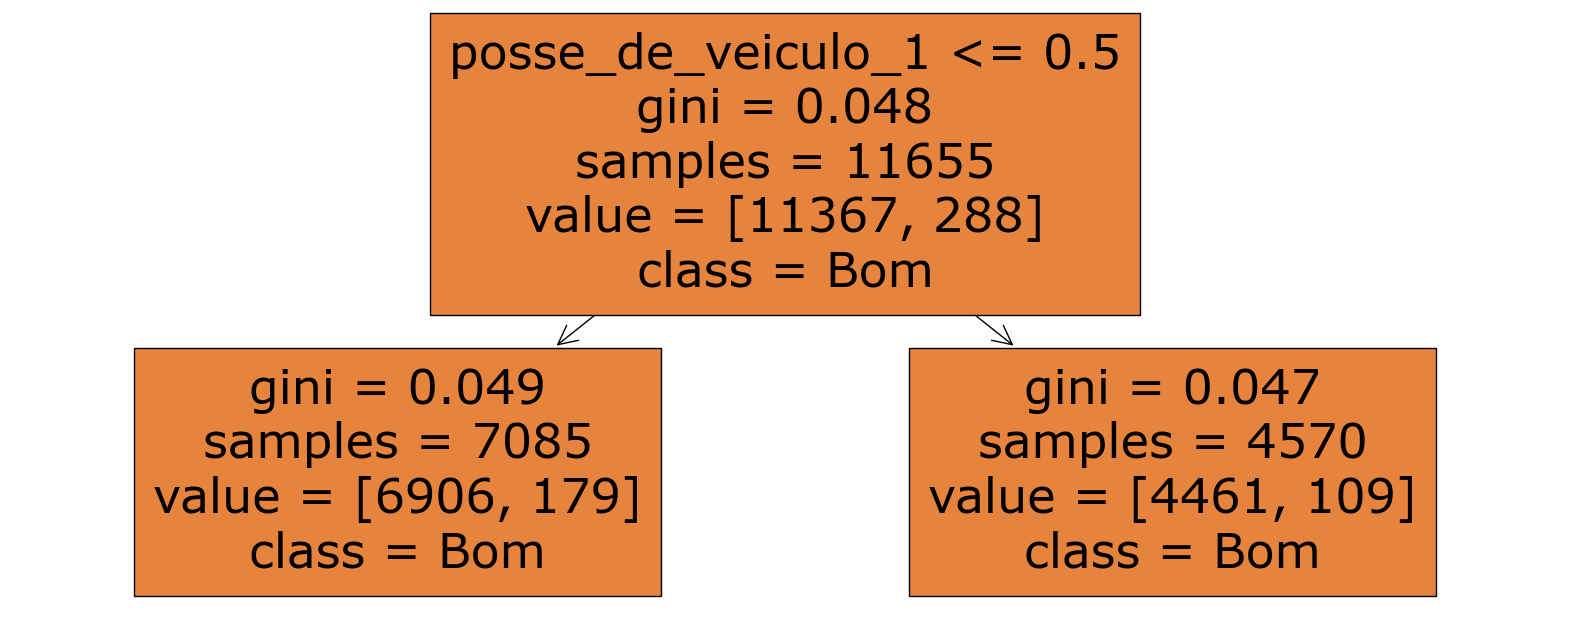

In [65]:
plt.figure(figsize=(20, 8))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=['posse_de_veiculo_1']
)
plt.show()

*4. Matriz de Confusão*

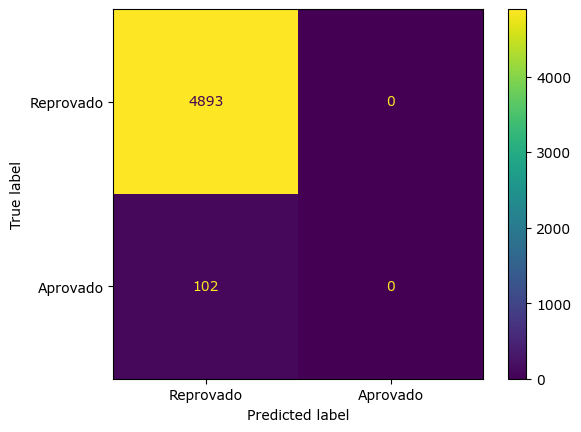

In [66]:
ConfusionMatrixDisplay.from_estimator(
    clf, 
    X_test, 
    y_test, 
    display_labels=['Reprovado', 'Aprovado']
)
plt.show()


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

*1. Classifique a base de teste*

In [67]:
y_pred_test = clf.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

*2. Matriz de Confusão da Base de Teste*

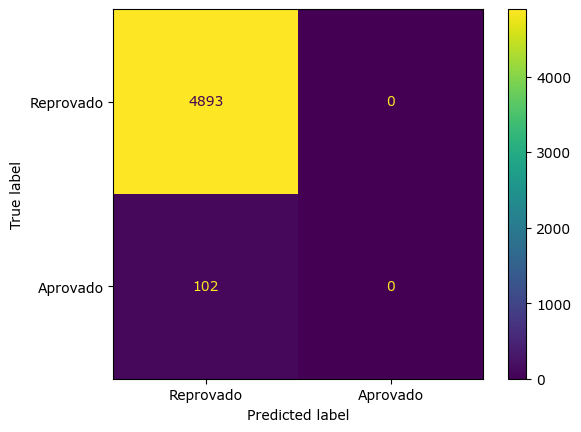

In [68]:
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_test, 
    display_labels=['Reprovado', 'Aprovado']
)
plt.show()

*3. Cálculo da Acurácia*

3.1 Acurácia de teste

In [69]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de teste: {accuracy_test:.2%}")

Acurácia na base de teste: 97.96%


3.2 Acurácia de Treinamento

In [70]:
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {accuracy_train:.2%}")

Acurácia na base de treinamento: 97.53%


*4. Treino da Árvore Nova*

In [73]:
clf_restrito = DecisionTreeClassifier(
    random_state=123, 
    min_samples_leaf=5, 
    max_depth=10
)
clf_restrito = clf_restrito.fit(X_train, y_train)

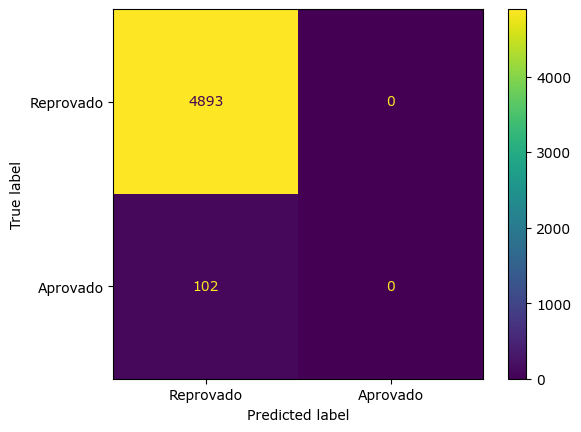

In [74]:
y_pred_test_restrito = clf_restrito.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_test_restrito, 
    display_labels=['Reprovado', 'Aprovado']
)
plt.show()

In [76]:
pd.Series(y_pred_test_restrito).value_counts(normalize=True).rename(
    index={0: 'Bom', 1: 'Mau'}
)

Bom    1.0
Name: proportion, dtype: float64

*5. Acurácia com contratos bons*

In [77]:
y_pred_bons = np.zeros_like(y_test)

acuracia_bons = accuracy_score(y_test, y_pred_bons)
print(f"Acurácia ao classificar todos como 'bons': {acuracia_bons:.2%}")

Acurácia ao classificar todos como 'bons': 97.96%
